In [1]:
from pythtb import TBModel, Lattice
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cartesian axes (identity) keep the bookkeeping simple for a 0D molecule
lat_vecs = np.eye(3)

# Reduced coordinates of the four orbitals: one nitrogen at the origin, three hydrogens around it
orb_vecs = np.array(
    [
        [0, 0, 0],  # nitrogen s
        [np.sqrt(3) / 3, 0, -1],  # hydrogen s
        [-np.sqrt(3) / 6, 1 / 2, -1],  # hydrogen s
        [-np.sqrt(3) / 6, -1 / 2, -1],  # hydrogen s
    ],
    dtype=float,
)

# A finite model has no periodic directions:
# we can specify an empty list (default) or None
lat = Lattice(lat_vecs, orb_vecs, periodic_dirs=[])

In [3]:
model = TBModel(lattice=lat, spinful=False)

In [4]:
eps_N = -5.0  # onsite Nitrogen
eps_H = 0.0  # onsite Hydrogen
t = -2.0  # hopping N–H

# Basis defined in same order as specified orbital vectors
model.set_onsite([eps_N, eps_H, eps_H, eps_H])

# N is site 0; H sites are 1, 2, 3. Only N–H hops.
model.set_hop(t, 0, 1)
model.set_hop(t, 0, 2)
model.set_hop(t, 0, 3)

print(model)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 3
k-space dimension           = 0
periodic directions         = []
spinful                     = False
number of spin components   = 1
number of electronic states = 4
number of orbitals          = 4

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000,  0.000,  0.000]
  # 1 ===> [ 0.000,  1.000,  0.000]
  # 2 ===> [ 0.000,  0.000,  1.000]
Volume of unit cell (Cartesian) = 1.000 [A^d]

Orbital vectors (Cartesian):
  # 0 ===> [ 0.000,  0.000,  0.000]
  # 1 ===> [ 0.577,  0.000, -1.000]
  # 2 ===> [-0.289,  0.500, -1.000]
  # 3 ===> [-0.289, -0.500, -1.000]

Orbital vectors (fractional):
  # 0 ===> [ 0.000,  0.000,  0.000]
  # 1 ===> [ 0.577,  0.000, -1.000]
  # 2 ===> [-0.289,  0.500, -1.000]
  # 3 ===> [-0.289, -0.500, -1.000]
----------------------------------------
Site energies:
  < 0 | H | 0 > = -5.000 
  < 1 | H | 1 > =  0.000 
  < 2 |

In [5]:
model.visualize_3d()

In [6]:
evals, evecs = model.solve_ham(return_eigvecs=True)

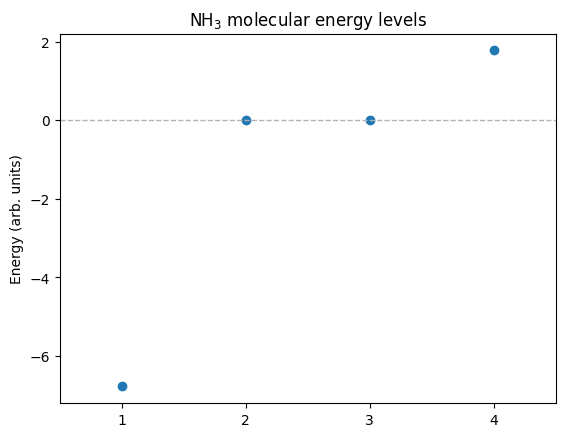

In [7]:
fig, ax = plt.subplots()

ax.plot(range(1, len(evals) + 1), evals, "o", color="#1f77b4")
ax.axhline(0.0, linestyle="--", color="0.7", linewidth=1)

ax.set_xticks(range(1, len(evals) + 1))
# ax.set_xticklabels([r"$E_1$", r"$E_2$", r"$E_3$", r"$E_4$"])
ax.set_xlim(0.5, len(evals) + 0.5)
ax.set_ylabel("Energy (arb. units)")
ax.set_title("NH$_3$ molecular energy levels")
plt.show()

In [8]:
E_analytic_plus = (eps_N + eps_H) / 2 + np.sqrt(((eps_N - eps_H) / 2) ** 2 + 3 * t**2)
E_analytic_minus = (eps_N + eps_H) / 2 - np.sqrt(((eps_N - eps_H) / 2) ** 2 + 3 * t**2)

print(f"Analytic energies: {E_analytic_minus}, {eps_H}, {eps_H}, {E_analytic_plus}")
print(f"Computed energies: {evals[0]}, {evals[1]}, {evals[2]}, {evals[3]}")

Analytic energies: -6.772001872658765, 0.0, 0.0, 1.7720018726587652
Computed energies: -6.772001872658766, 0.0, 0.0, 1.7720018726587654
